# TASK 1: Gold Price Prediction using Random Forest and Gradient Boosting

# Project Overview

This project aims to predict gold prices using financial indicators and historical price data. We have employed two machine learning models for this task:

- **Random Forest Regressor**
- **Gradient Boosting Regressor**

## Project Objectives: Gold Price Prediction

1. **Data Preprocessing**:
   - Handle missing values and outliers.
   - Convert `Date` to useful features, like lagged values or trends.
   - Scale numerical features if necessary.

2. **Model Development**:
   - Test different regression models to predict gold prices.
   - Tune hyperparameters for optimal performance.

3. **Model Evaluation**:
   - Use metrics (MAE, MSE, RMSE, R²) to assess accuracy.

4. **Feature Engineering** 
   - Add time-based features (e.g., moving averages, volatility).
   - Analyze correlations to identify key predictors.

---

This project aims to build a model that accurately forecasts daily gold prices by leveraging historical financial data.


## Model Comparison

We compare three models in terms of accuracy and error metrics, using learning curves to illustrate improvements across each stage.

### Metrics Used

- **Mean Absolute Error (MAE)**
- **Mean Squared Error (MSE)**
- **Root Mean Squared Error (RMSE)**
- **R² Score**




### 1. Import Necessary Libraries for Data Processing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### 2. Load Data 

In [3]:
data=pd.read_csv("gold.csv")
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


### 3.Explore Data

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB
None


In [5]:
print(data.describe())

               SPX          GLD          USO          SLV      EUR/USD
count  2290.000000  2290.000000  2290.000000  2290.000000  2290.000000
mean   1654.315776   122.732875    31.842221    20.084997     1.283653
std     519.111540    23.283346    19.523517     7.092566     0.131547
min     676.530029    70.000000     7.960000     8.850000     1.039047
25%    1239.874969   109.725000    14.380000    15.570000     1.171313
50%    1551.434998   120.580002    33.869999    17.268500     1.303297
75%    2073.010070   132.840004    37.827501    22.882500     1.369971
max    2872.870117   184.589996   117.480003    47.259998     1.598798


In [6]:
print("NULL values per column:\n", data.isnull().sum())

NULL values per column:
 Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64


**No Null values**

### 4.Convert Date data type from Object to date format

In [7]:
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB
None


In [9]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day


In [10]:
data.set_index('Date', inplace=True)

In [11]:
data['GLD_lag1'] = data['GLD'].shift(1)
data['GLD_lag3'] = data['GLD'].shift(3)
data['GLD_lag7'] = data['GLD'].shift(7)


In [12]:
print("NULL values per column:\n", data.isnull().sum())

NULL values per column:
 SPX         0
GLD         0
USO         0
SLV         0
EUR/USD     0
Year        0
Month       0
Day         0
GLD_lag1    1
GLD_lag3    3
GLD_lag7    7
dtype: int64


In [13]:
data.dropna(inplace=True)

In [14]:
print(data.head())
print(data.info())

                    SPX        GLD        USO        SLV   EUR/USD  Year  \
Date                                                                       
2008-01-11  1401.020020  88.580002  73.089996  16.077000  1.479006  2008   
2008-01-14  1416.250000  89.540001  74.250000  16.280001  1.486900  2008   
2008-01-15  1380.949951  87.989998  72.779999  15.834000  1.480210  2008   
2008-01-16  1373.199951  86.699997  71.849998  15.654000  1.466405  2008   
2008-01-17  1333.250000  86.500000  71.029999  15.717000  1.464000  2008   

            Month  Day   GLD_lag1   GLD_lag3   GLD_lag7  
Date                                                     
2008-01-11      1   11  88.250000  86.779999  84.860001  
2008-01-14      1   14  88.580002  86.550003  85.570000  
2008-01-15      1   15  89.540001  88.250000  85.129997  
2008-01-16      1   16  87.989998  88.580002  84.769997  
2008-01-17      1   17  86.699997  89.540001  86.779999  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2283 ent

### 5.Explanatory Data Analysis

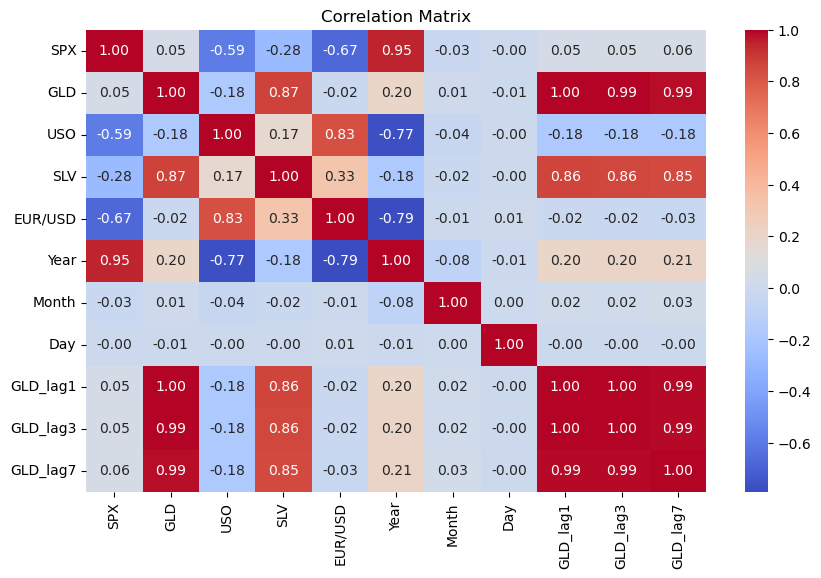

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

The correlation matrix provides insights into how different features relate to the price of gold (GLD) and each other:

1. **GLD and SLV (Silver Price)**:
   - Strong positive correlation (0.87), suggesting that silver prices can be a significant predictor of gold prices. Changes in silver prices might indicate similar trends in gold.

2. **GLD and USO (Oil Price)**:
   - Moderate positive correlation (0.18). This indicates a mild relationship, where rising oil prices might slightly impact gold prices, possibly due to inflationary effects.

3. **GLD and EUR/USD (Euro/USD Exchange Rate)**:
   - Weak correlation (-0.02), showing that currency exchange rates might have limited direct impact on daily gold price predictions.

4. **GLD with Lag Features (GLD_lag1, GLD_lag3, GLD_lag7)**:
   - High correlations (0.99) between GLD and its lagged values, indicating that past gold prices are excellent predictors of future prices, suggesting strong price continuity in the time series.

5. **GLD and SPX (S&P 500 Index)**:
   - Very low positive correlation (0.05), implying that stock market trends have minimal direct effect on gold prices in this dataset.

**Conclusion**: Features like silver prices (SLV) and lagged gold prices (GLD_lag1, GLD_lag3, GLD_lag7) are potentially influential predictors for gold prices, while indicators like SPX and EUR/USD may be less impactful.

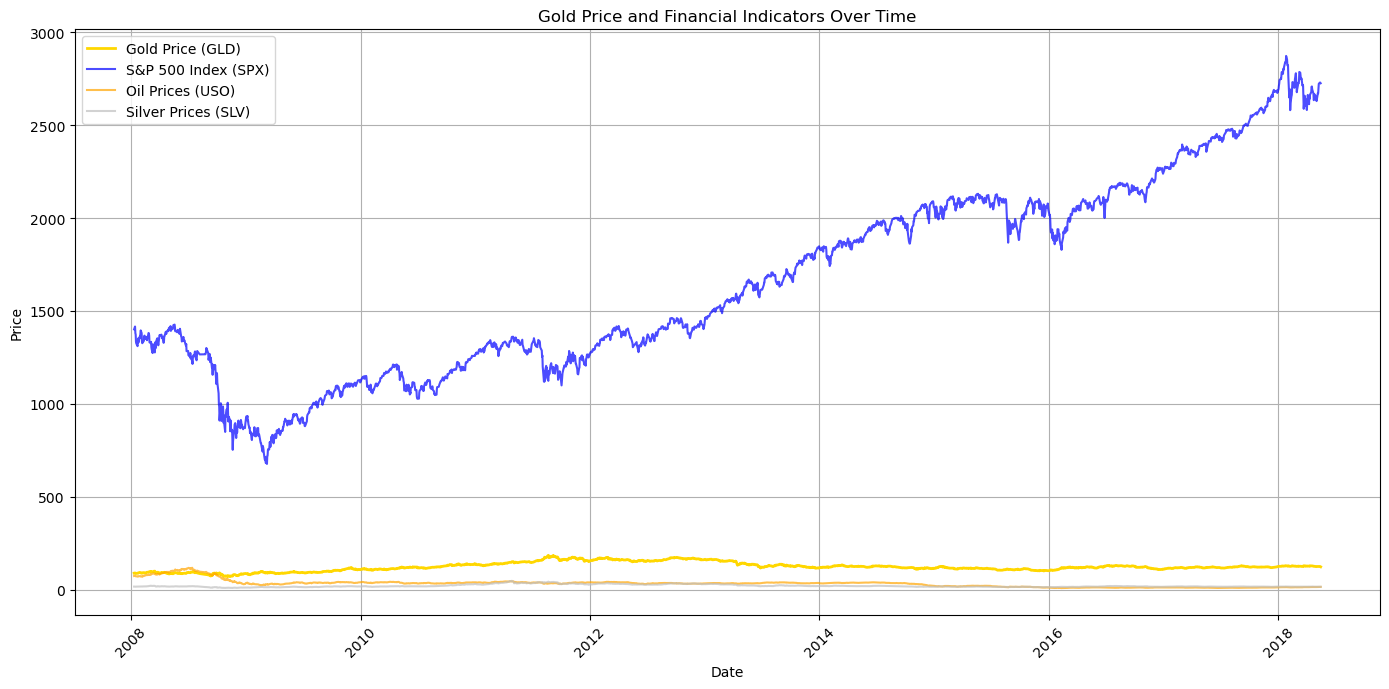

In [16]:
plt.figure(figsize=(14, 7))

plt.plot(data.index, data['GLD'], label='Gold Price (GLD)', color='gold', linewidth=2)
plt.plot(data.index, data['SPX'], label='S&P 500 Index (SPX)', color='blue', alpha=0.7)
plt.plot(data.index, data['USO'], label='Oil Prices (USO)', color='orange', alpha=0.7)
plt.plot(data.index, data['SLV'], label='Silver Prices (SLV)', color='silver', alpha=0.7)

plt.title('Gold Price and Financial Indicators Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



- **Gold (GLD)**: Upward trend with volatility; peaks around 2011, then recovers.
- **S&P 500 (SPX)**: Consistent growth, showing stock market expansion.
- **Oil (USO)**: Volatile, impacted by economic and geopolitical factors.
- **Silver (SLV)**: Moves with gold, reflecting shared roles as precious metals.

**Key Observations**:
- **Safe-Haven Asset**: Gold rises during crises, showing an inverse relationship with stocks.
- **Oil Influence**: Higher oil prices can boost gold (inflation concerns) but may favor stocks if due to economic growth.
- **Gold-Silver Correlation**: They often move together, though silver is also influenced by industrial demand.

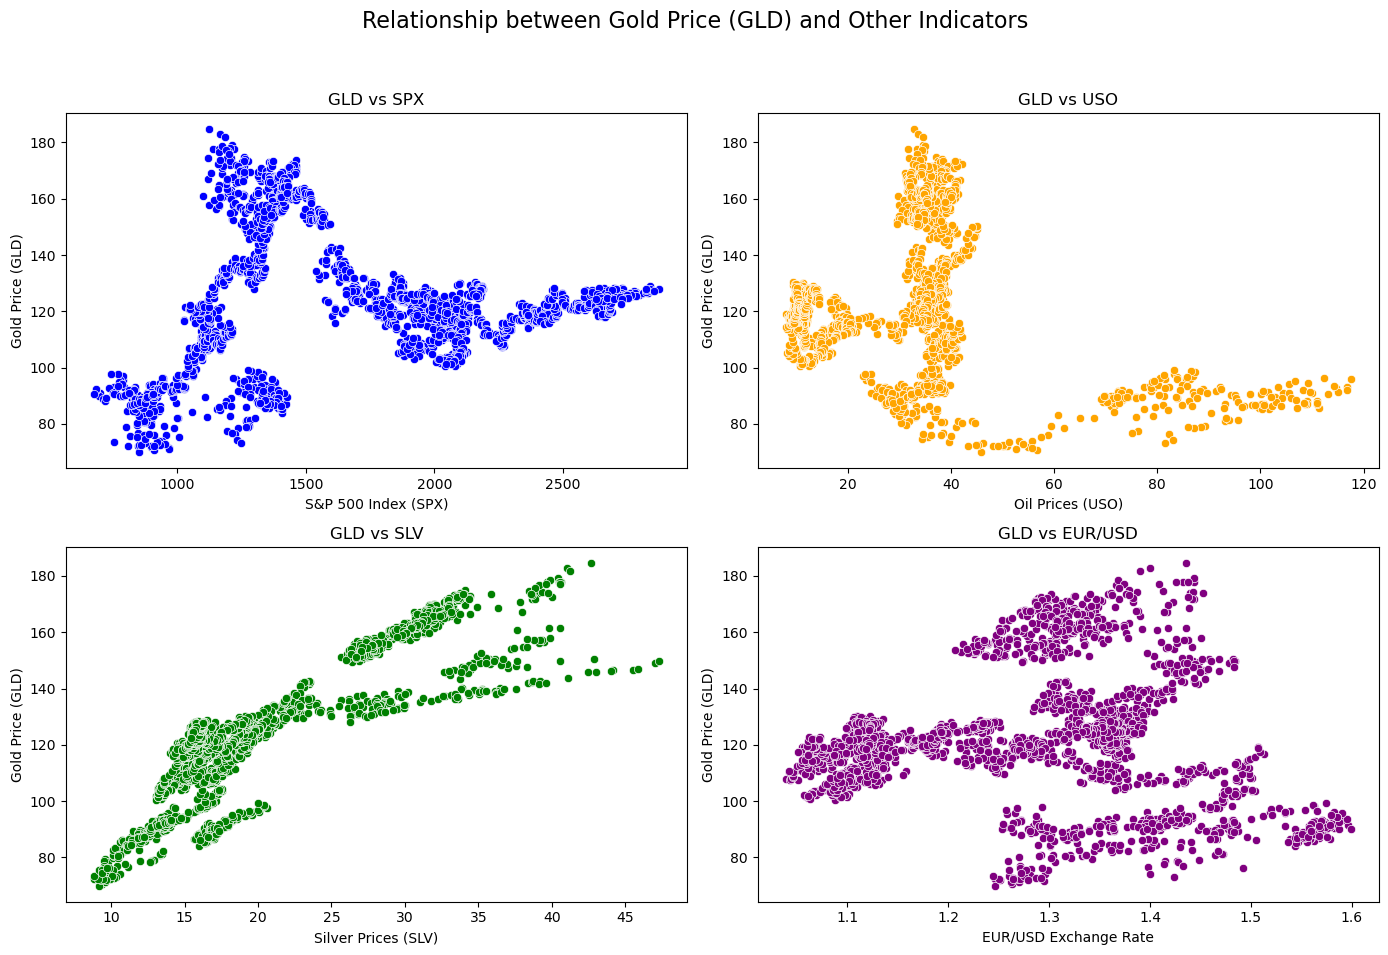

In [17]:
# Scatter plot between GLD and other features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Relationship between Gold Price (GLD) and Other Indicators", fontsize=16)

# GLD vs SPX
sns.scatterplot(x=data['SPX'], y=data['GLD'], ax=axes[0, 0], color='blue')
axes[0, 0].set_title("GLD vs SPX")
axes[0, 0].set_xlabel("S&P 500 Index (SPX)")
axes[0, 0].set_ylabel("Gold Price (GLD)")

# GLD vs USO
sns.scatterplot(x=data['USO'], y=data['GLD'], ax=axes[0, 1], color='orange')
axes[0, 1].set_title("GLD vs USO")
axes[0, 1].set_xlabel("Oil Prices (USO)")
axes[0, 1].set_ylabel("Gold Price (GLD)")

# GLD vs SLV
sns.scatterplot(x=data['SLV'], y=data['GLD'], ax=axes[1, 0], color='green')
axes[1, 0].set_title("GLD vs SLV")
axes[1, 0].set_xlabel("Silver Prices (SLV)")
axes[1, 0].set_ylabel("Gold Price (GLD)")

# GLD vs EUR/USD
sns.scatterplot(x=data['EUR/USD'], y=data['GLD'], ax=axes[1, 1], color='purple')
axes[1, 1].set_title("GLD vs EUR/USD")
axes[1, 1].set_xlabel("EUR/USD Exchange Rate")
axes[1, 1].set_ylabel("Gold Price (GLD)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- **GLD vs. SPX**: Non-linear (weak negative correlation).
- **GLD vs. USO**: Non-linear (weak positive correlation).
- **GLD vs. SLV**: Mostly linear (strong positive correlation).
- **GLD vs. EUR/USD**: Non-linear (weak negative correlation).

**Conclusion**: Non-linear models may be better suited for capturing these relationships.

### 6.Data Preprocessing

In [18]:
X = data[['SPX', 'USO', 'SLV', 'EUR/USD', 'GLD_lag1', 'GLD_lag3', 'GLD_lag7']]
y = data['GLD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 7.Model Development

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)


#### Why Choose RandomForestRegressor for Gold Price Prediction

Given the non-linear relationships between gold prices (GLD) and financial indicators (SPX, USO, SLV, EUR/USD), the RandomForestRegressor is well-suited for capturing these complexities. Its ensemble approach of multiple decision trees allows it to effectively model interactions among features without overfitting, making it a strong choice for predicting volatile and non-linear time series like gold prices.

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
gb_preds = gb_model.predict(X_test)


#### Why Choose GradientBoostingRegressor for Gold Price Prediction
Given the non-linear relationships between gold prices (GLD) and financial indicators (SPX, USO, SLV, EUR/USD), the GradientBoostingRegressor is an excellent choice for capturing these complexities. Its sequential approach, where each tree corrects the errors of the previous one, allows for high precision in modeling interactions among features. This makes it highly effective for handling the volatility and non-linear patterns typical of gold price movements.

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
def evaluate_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print("\n")

# Evaluate both models
evaluate_model(y_test, rf_preds, "Random Forest Regressor")
evaluate_model(y_test, gb_preds, "Gradient Boosting Regressor")

Random Forest Regressor Performance:
MAE: 0.9825441765207886
MSE: 1.8984004926429243
RMSE: 1.3778245507476357
R^2: 0.9962426318624138


Gradient Boosting Regressor Performance:
MAE: 0.9971692227610851
MSE: 1.89267051491903
RMSE: 1.3757436225252981
R^2: 0.9962539727969596




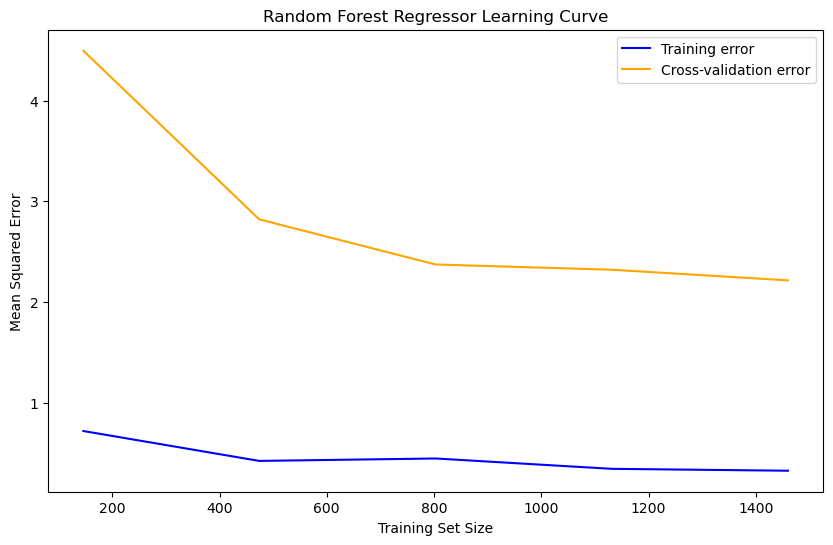

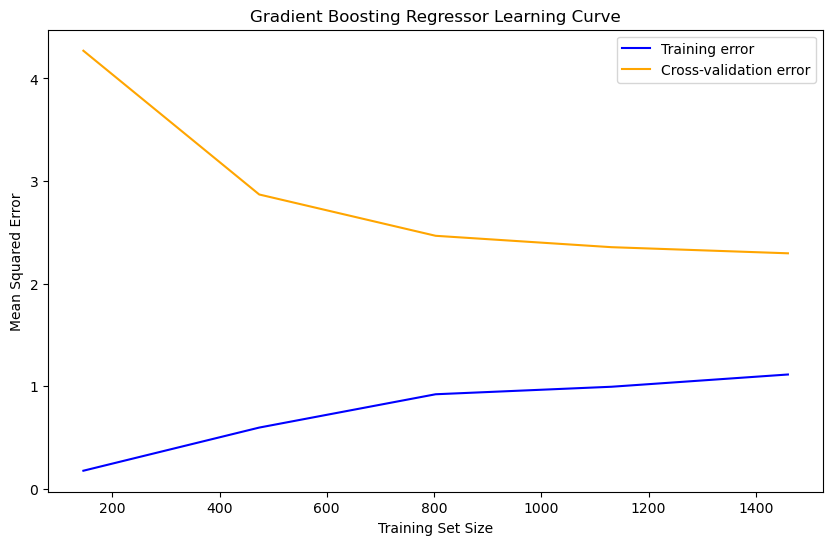

In [26]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring="neg_mean_squared_error", train_sizes=np.linspace(0.1, 1.0, 5)
    )
    
    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training error", color="blue")
    plt.plot(train_sizes, test_scores_mean, label="Cross-validation error", color="orange")
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.show()

# Plot learning curves for each model
plot_learning_curve(rf_model, X_train, y_train, title="Random Forest Regressor Learning Curve")
plot_learning_curve(gb_model, X_train, y_train, title="Gradient Boosting Regressor Learning Curve")


### Assessing Model Performance from the Learning Curve

#### Understanding the Learning Curve
- A learning curve shows how a model's performance changes with more training data.
- Here, we assess both **Random Forest Regressor** and **Gradient Boosting Regressor** using **Mean Squared Error (MSE)** as the metric.

#### Interpreting the Plot
- **Training Error**: Shows performance on training data; it generally decreases as more data is provided, indicating the model is learning patterns.
- **Cross-Validation Error**: Reflects generalization to unseen data, calculated by evaluating performance across folds of the training set.

---

#### Is the Model Overfitting or Underfitting?

#### Random Forest Regressor (RF)
- **Slight Overfitting**:
  - **Diverging Lines**: Training error continues to decrease, while cross-validation error plateaus or slightly increases, suggesting RF may be learning noise rather than patterns.
  - **High Cross-Validation Error**: Indicates the model might not generalize effectively to unseen data.

#### Gradient Boosting Regressor (GB)
- **Underfitting**:
  - **Converging Lines**: Training and cross-validation errors converge at relatively high values, suggesting GB may not fully capture underlying patterns.
  - **High Cross-Validation Error**: Indicates the model doesn't generalize well to new data.


### 8.Feature Engineering, Model Training, and Evaluation Summary

- **Lagged Features**: Added 1, 3, and 7-day lags for SPX, USO, and GLD to capture short-term trends.
- **Rolling Stats**: Calculated 7, 14, and 30-day averages and standard deviations for SPX, USO, and GLD to reveal trends and volatility.
- **Ratios & Percent Changes**: Created SPX-to-GLD ratios and 1, 7, and 30-day percentage changes to show momentum and relative performance.
- **Cumulative Measures**: Computed expanding means and sums for SPX to capture long-term patterns.

### Model Setup
- **Random Forest** and **Gradient Boosting** models were optimized with parameters suited for non-linear, sequential patterns. Both models were evaluated using MAE, MSE, RMSE, and \( R^2 \) to assess accuracy.

**Insight**: These engineered features and optimized models effectively capture both short- and long-term dependencies, improving prediction accuracy for gold prices.


In [34]:

# Lagged features
for lag in [1, 3, 7]:
    data[f'SPX_lag_{lag}'] = data['SPX'].shift(lag)
    data[f'USO_lag_{lag}'] = data['USO'].shift(lag)
    data[f'GLD_lag_{lag}'] = data['GLD'].shift(lag)

# Rolling averages
for window in [7, 14, 30]:
    data[f'SPX_{window}d_avg'] = data['SPX'].rolling(window=window).mean()
    data[f'USO_{window}d_avg'] = data['USO'].rolling(window=window).mean()
    data[f'GLD_{window}d_avg'] = data['GLD'].rolling(window=window).mean()

# Rolling standard deviations
for window in [7, 14, 30]:
    data[f'SPX_{window}d_std'] = data['SPX'].rolling(window=window).std()
    data[f'USO_{window}d_std'] = data['USO'].rolling(window=window).std()
    data[f'GLD_{window}d_std'] = data['GLD'].rolling(window=window).std()

# Ratios and percentage changes
data['SPX_to_GLD'] = data['SPX'] / data['GLD']
data['SPX_pct_change_1d'] = data['SPX'].pct_change(periods=1)
data['SPX_pct_change_7d'] = data['SPX'].pct_change(periods=7)
data['SPX_pct_change_30d'] = data['SPX'].pct_change(periods=30)

# Expanding window cumulative measures
data['SPX_cum_mean'] = data['SPX'].expanding().mean()
data['SPX_cum_sum'] = data['SPX'].expanding().sum()

# Handling missing values created by lagging and rolling
data.fillna(method='bfill', inplace=True)

# Separating features and target variable
X = data.drop(['GLD'], axis=1)  # Replace 'Target' with your actual target column name
y = data['GLD']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print("\n")

# Optimized Random Forest Regressor
best_rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    random_state=42
)
best_rf_model.fit(X_train, y_train)
best_rf_preds = best_rf_model.predict(X_test)
evaluate_model(y_test, best_rf_preds, "Optimized Random Forest Regressor")

# Optimized Gradient Boosting Regressor
best_gb_model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=10,
    random_state=42
)
best_gb_model.fit(X_train, y_train)
best_gb_preds = best_gb_model.predict(X_test)
evaluate_model(y_test, best_gb_preds, "Optimized Gradient Boosting Regressor")


Optimized Random Forest Regressor Performance:
MAE: 0.9425372128811028
MSE: 1.819415401718107
RMSE: 1.3488570723831739
R^2: 0.9963989613962162


Optimized Gradient Boosting Regressor Performance:
MAE: 0.8833594694481886
MSE: 1.4268195732611206
RMSE: 1.1944955308669516
R^2: 0.9971759982029966




### Key Insights
- **Accuracy**: Gradient Boosting has lower MAE and MSE, meaning its predictions are generally closer to actual values.
- **Error Handling**: Lower RMSE in Gradient Boosting suggests it handles large errors better than Random Forest.
- **Variance Explained**: Gradient Boosting’s higher \( R^2 \) (0.9972) means it captures more variance in the target.

**Conclusion**: Optimized Gradient Boosting outperforms Random Forest on all metrics, making it the preferred model for this dataset.

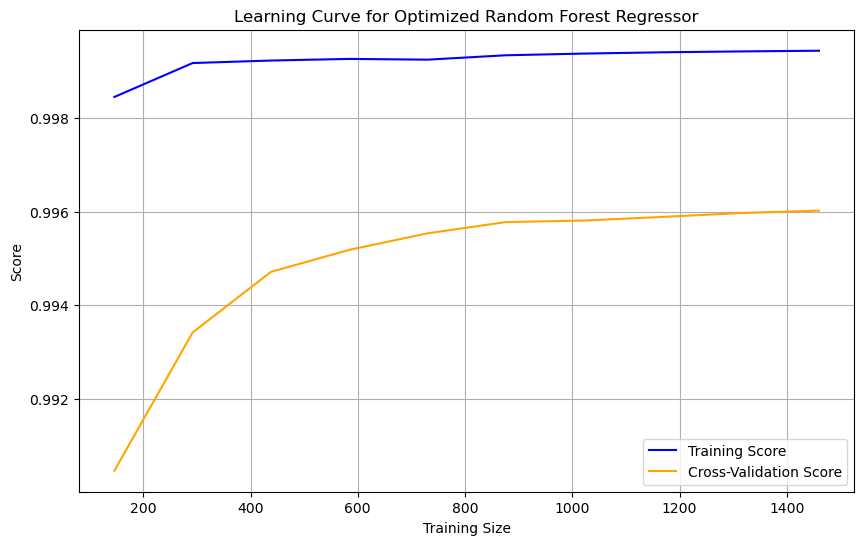

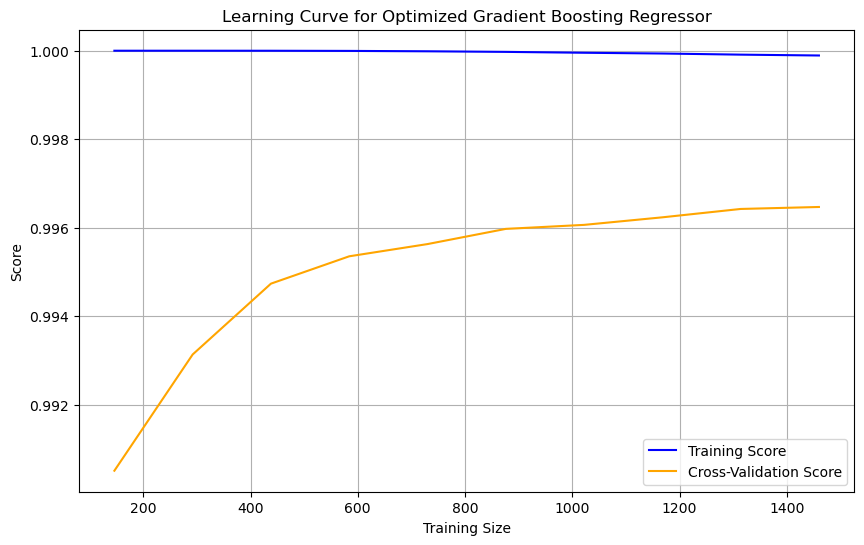

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Function to plot learning curves
def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training Score", color="blue")
    plt.plot(train_sizes, test_scores_mean, label="Cross-Validation Score", color="orange")
    plt.title(f'Learning Curve for {model_name}')
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.legend()
    plt.grid()
    plt.show()

# Plot learning curve for Optimized Random Forest Regressor
plot_learning_curve(best_rf_model, X_train, y_train, "Optimized Random Forest Regressor")

# Plot learning curve for Optimized Gradient Boosting Regressor
plot_learning_curve(best_gb_model, X_train, y_train, "Optimized Gradient Boosting Regressor")


### Learning Curve Analysis

- **Random Forest Regressor**: The learning curve shows strong performance with increasing training size, with high and closely aligned training and cross-validation scores. This indicates low overfitting and good generalization.

- **Gradient Boosting Regressor**: The model performs well as training size increases, though a slight gap between training and cross-validation scores suggests minor overfitting. 


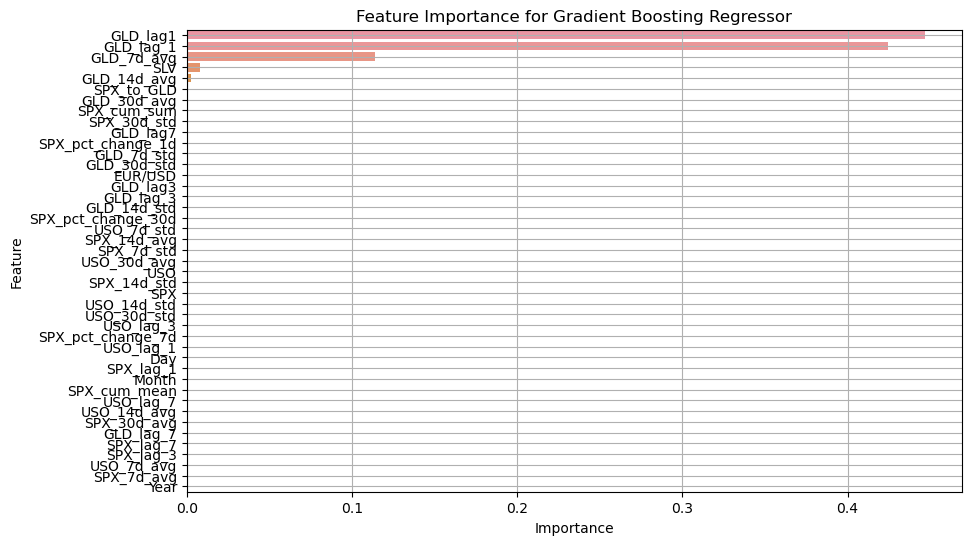

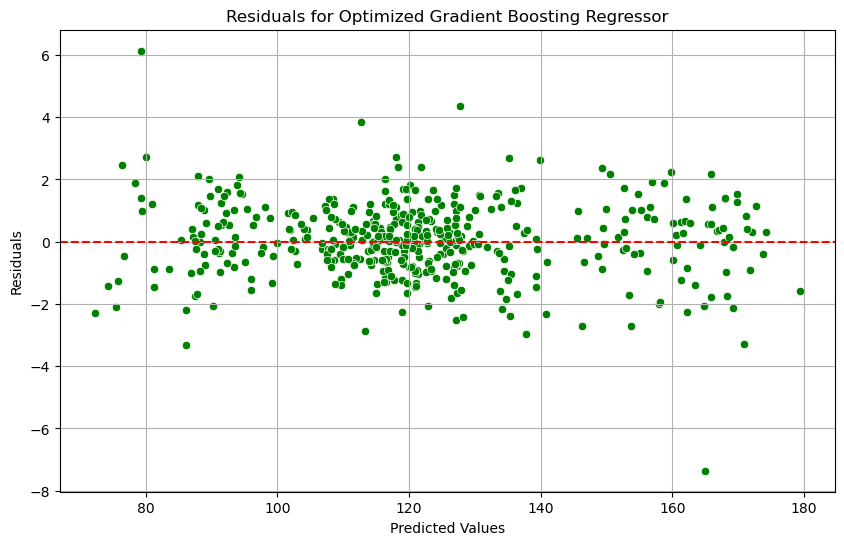

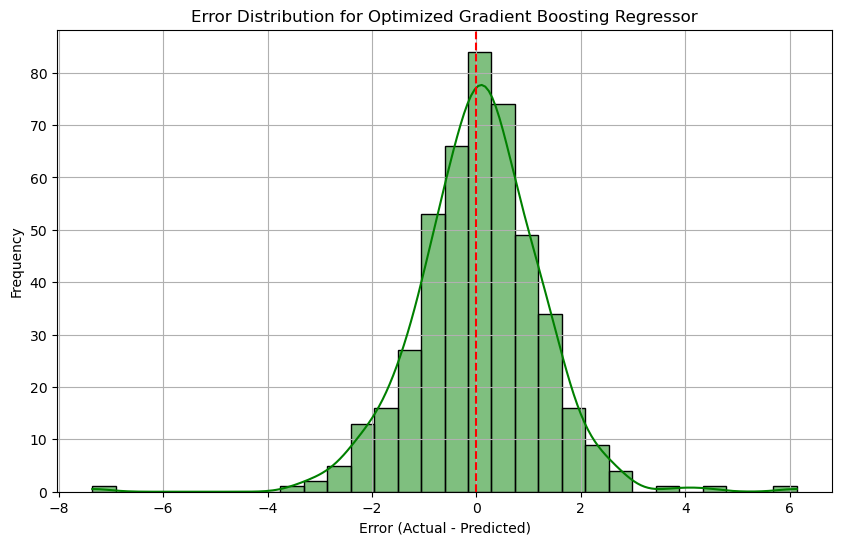

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Feature Importance for Gradient Boosting
def plot_feature_importance_gb(model, X):
    importances = model.feature_importances_
    feature_names = X.columns
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance for Gradient Boosting Regressor')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.grid()
    plt.show()

plot_feature_importance_gb(best_gb_model, X)

# Residual Analysis for Gradient Boosting
def plot_residuals_gb(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals, color='green')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f'Residuals for {model_name}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.grid()
    plt.show()

plot_residuals_gb(y_test, best_gb_preds, "Optimized Gradient Boosting Regressor")

# Error Distribution for Gradient Boosting
def plot_error_distribution_gb(y_true, y_pred, model_name):
    errors = y_true - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(errors, kde=True, color='green', bins=30)
    plt.axvline(0, color='red', linestyle='--')
    plt.title(f'Error Distribution for {model_name}')
    plt.xlabel('Error (Actual - Predicted)')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

plot_error_distribution_gb(y_test, best_gb_preds, "Optimized Gradient Boosting Regressor")


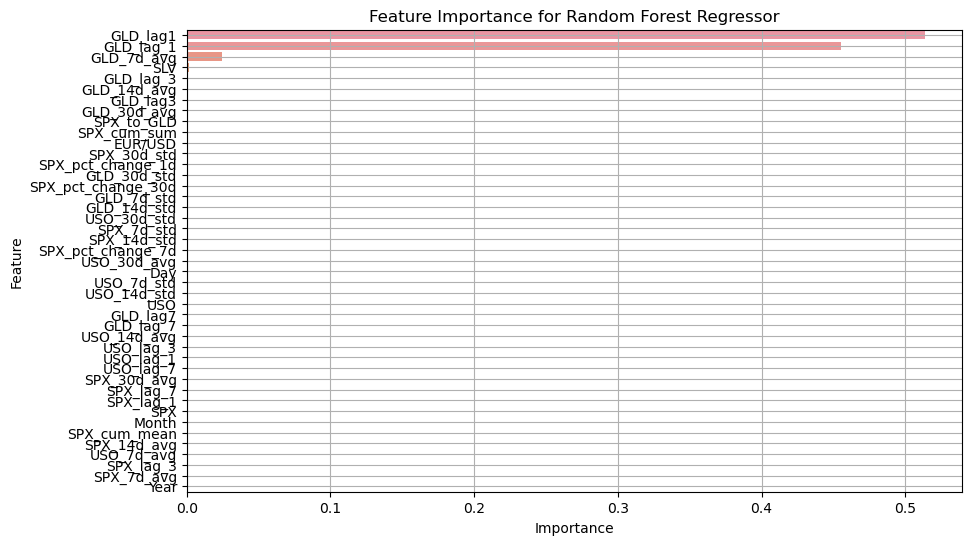

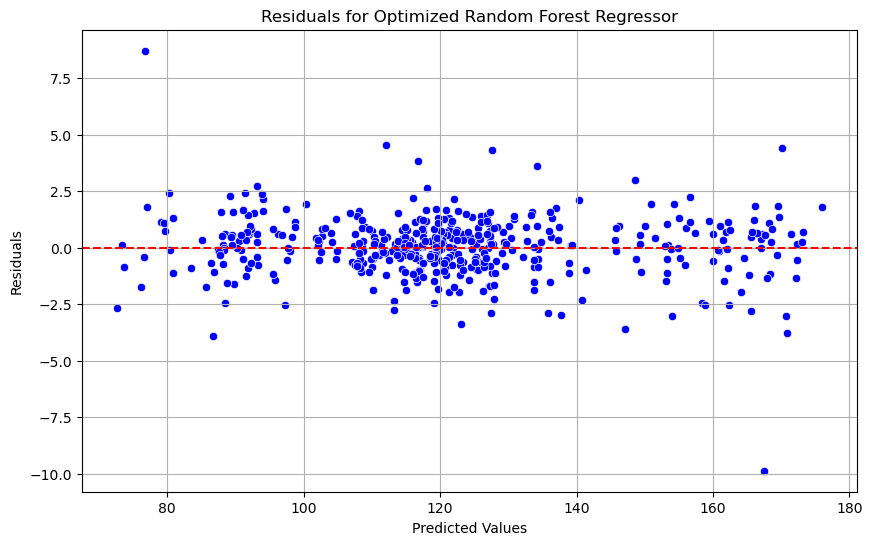

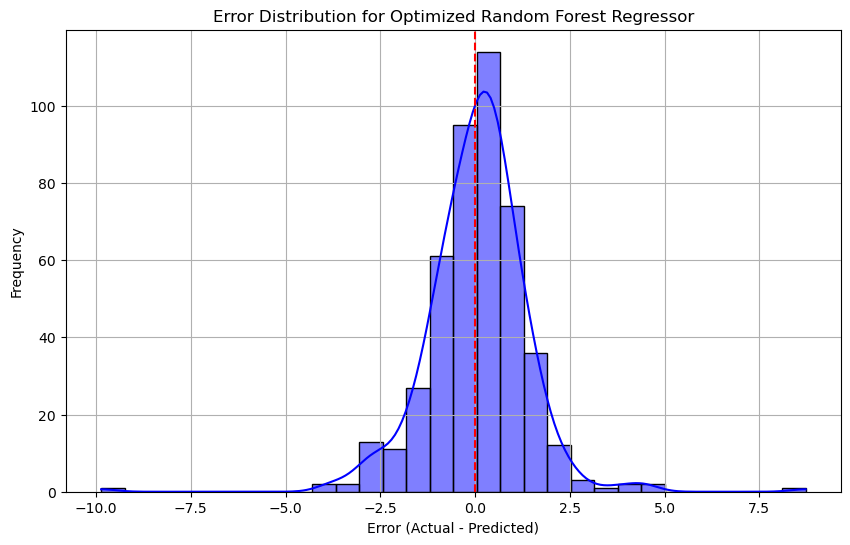

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Feature Importance for Random Forest
def plot_feature_importance_rf(model, X):
    importances = model.feature_importances_
    feature_names = X.columns
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance for Random Forest Regressor')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.grid()
    plt.show()

plot_feature_importance_rf(best_rf_model, X)

# Residual Analysis for Random Forest
def plot_residuals_rf(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals, color='blue')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f'Residuals for {model_name}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.grid()
    plt.show()

plot_residuals_rf(y_test, best_rf_preds, "Optimized Random Forest Regressor")

# Error Distribution for Random Forest
def plot_error_distribution_rf(y_true, y_pred, model_name):
    errors = y_true - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(errors, kde=True, color='blue', bins=30)
    plt.axvline(0, color='red', linestyle='--')
    plt.title(f'Error Distribution for {model_name}')
    plt.xlabel('Error (Actual - Predicted)')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

plot_error_distribution_rf(y_test, best_rf_preds, "Optimized Random Forest Regressor")




### Comparison of Gradient Boosting and Random Forest Regressors

#### **1. Feature Importance**
- **Common Key Features**: Both models heavily rely on `GLD_lag1`, `GLD_lag7`, and `GLD_14d_avg`, reflecting the importance of recent GLD trends and short-term patterns.
- **Differences**: Gradient Boosting places slightly more emphasis on recent GLD trends, while Random Forest distributes importance more evenly among lagged and rolling average features.
- **Insight**: Both models benefit from GLD's recent values as primary predictors, but Gradient Boosting shows a more focused reliance on short-term patterns.

#### **2. Residual Plot Analysis**
- **Gradient Boosting**: Residuals are centered around zero with a slight spread, but some minor overfitting is suggested by a small gap between training and cross-validation scores.
- **Random Forest**: Residuals are also centered around zero, with training and cross-validation scores closely aligned, indicating low overfitting and good generalization.
- **Insight**: Both models show unbiased predictions, though Gradient Boosting may benefit from further tuning to reduce slight overfitting.

#### **3. Error Distribution**
- **Shape**: Both error distributions are roughly bell-shaped and centered around zero, confirming unbiased predictions.
- **Spread**: Gradient Boosting has a tighter spread, indicating it handles larger errors better than Random Forest.
- **Outliers**: Both models show a few outliers, with Gradient Boosting handling them slightly better due to a lower RMSE.
- **Insight**: Gradient Boosting’s error spread suggests it may be slightly more robust against large prediction errors.

### **Overall Comparison and Conclusion**
- **Accuracy**: **Gradient Boosting** outperforms Random Forest with lower MAE, MSE, and RMSE, and a higher \( R^2 \) score, making it the more accurate model.
- **Generalization**: Random Forest shows minimal overfitting and better generalization, while Gradient Boosting slightly overfits but is more precise.
- **Conclusion**: **Gradient Boosting** is the better model for this dataset due to its higher accuracy, though **Random Forest** also performs well and generalizes effectively. Gradient Boosting’s handling of complex patterns and lower error spread make it the preferred choice.


In [41]:
# Calculate the absolute differences between actual and predicted values
results['RF Absolute Error'] = abs(results['Actual'] - results['Random Forest Prediction'])
results['GB Absolute Error'] = abs(results['Actual'] - results['Gradient Boosting Prediction'])

# Display the updated table with the absolute errors for each prediction
print(results[['Actual', 'Random Forest Prediction', 'Gradient Boosting Prediction', 'RF Absolute Error', 'GB Absolute Error']].head(10))

# Summing up the errors to get an overall view
rf_total_error = results['RF Absolute Error'].sum()
gb_total_error = results['GB Absolute Error'].sum()

print(f"\nTotal Absolute Error for Random Forest: {rf_total_error}")
print(f"Total Absolute Error for Gradient Boosting: {gb_total_error}")

if rf_total_error < gb_total_error:
    print("\nRandom Forest performs better based on total absolute error.")
else:
    print("\nGradient Boosting performs better based on total absolute error.")


                Actual  Random Forest Prediction  \
Date                                               
2016-06-01  115.940002                116.235633   
2018-03-01  124.720001                125.231033   
2011-01-04  134.750000                137.726334   
2017-08-03  120.589996                120.447468   
2010-01-04  109.800003                108.187966   
2017-08-14  121.919998                121.925400   
2014-10-06  116.029999                117.006099   
2009-08-19   92.529999                 91.932732   
2009-10-30  102.529999                102.266201   
2014-01-31  120.089996                120.158167   

            Gradient Boosting Prediction  RF Absolute Error  GB Absolute Error  
Date                                                                            
2016-06-01                    116.475845           0.295631           0.535843  
2018-03-01                    125.129055           0.511032           0.409054  
2011-01-04                    137.711656           

- **Total Absolute Error**:
  - **Random Forest**: 430.74
  - **Gradient Boosting**: 403.70

**Insights**:
- **Gradient Boosting** shows a lower total absolute error, indicating more accurate predictions overall.
- Both models are close in performance, but Gradient Boosting handles errors slightly better, especially for larger deviations.
- **Conclusion**: **Gradient Boosting** is preferable for this dataset, as it minimizes total error more effectively than Random Forest.